In [146]:
#https://archive.ics.uci.edu/dataset/222/bank+marketing
#importar os dados (X)
#analise desritiva das variaveis
#modelo de classificacao


Os dados contém informações sobre clientes abordados em uma campanha de marketing por telefone. O objetivo desta análise é criar um modelo para estimar se um cliente vai ou não fazer um depósito no banco (variável resposta denominada y).

* Variáveis: 
    - y: Se no cliente dez um depósito (Variável resposta)
    - age: Idade
    - job: Ocupação
    - marital: Estado civil (divorciado, casado ou solteiro)
    - education: Nível de educação
    - default: Se o cliente tem crédito em inadimplência
    - balance: Saldo médio anual
    - housing: Se tem empréstimo imobiliário
    - loan: Se tem empréstimo pessoal
    - contact: Tipo de contato (celular ou telefone)
    - day_of_week: Dia da semana do último contato
    - month: Mês do último contato
    - duration: Duração (em segundos) do último contato
    - campaign: Número de contatos feito com o cliente durante o período da campanha
    - pdays: Número de dias que se passaram deste o último contato em uma campanha anterior
    - previous: Número de dias que se passaram deste o último contato nesta mesma campanha
    - poutcome: Resultado da campanha anterior

In [147]:
#acessando os dados
from ucimlrepo import fetch_ucirepo 
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features 
y = bank_marketing.data.targets

df = pd.concat([y,X],axis=1)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            45211 non-null  object
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     8252 non-null   object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [149]:
#visualização dos dados
df.head(6)

,y,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,no,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,no,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,no,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,no,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN


# Estatística descritiva

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_variables = ['balance','duration','campaign']#age

for i in numerical_variables:
    print(i)
    display(df.groupby('y')[i].describe())

balance


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


duration


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


campaign


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


In [151]:
df_has = df[df['pdays'] >= 0]
display(df_has.groupby('y')['pdays'].describe())


#numerical_variables2 = ['pdays']
#for i in numerical_variables2:
#    print(i)
#    display(df.groupby('y')[i].describe())

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,6352.0,234.191436,111.022439,1.0,153.0,232.0,335.0,871.0
yes,1905.0,192.521785,123.441816,1.0,94.0,181.0,246.0,854.0


In [152]:
x = pd.DataFrame({'a':[1,2,3,7],'b':[4,5,6,9]})
y = pd.DataFrame({'c':[6,4,8,2],'d':[4,-1,1,0]})
z = pd.DataFrame({'e':[1,5,7,-2],'f':[0,0,10,-1]})

pd.concat([y,x,z],axis=1)

,c,d,a,b,e,f
0,6,4,1,4,1,0
1,4,-1,2,5,5,0
2,8,1,3,6,7,10
3,2,0,7,9,-2,-1


MultiIndex([('no',   'blue-collar'),
            ('no',    'management'),
            ('no',    'technician'),
            ('no',        'admin.'),
            ('no',      'services'),
            ('no',       'retired'),
            ('no', 'self-employed'),
            ('no',  'entrepreneur'),
            ('no',     'housemaid'),
            ('no',    'unemployed'),
            ('no',       'student')],
           names=['y', 'job'])


y    job          
no   blue-collar      0.23
     management       0.21
     technician       0.17
     admin.           0.11
     services         0.10
     retired          0.04
     self-employed    0.04
     entrepreneur     0.03
     housemaid        0.03
     unemployed       0.03
     student          0.02
yes  management       0.25
     technician       0.16
     blue-collar      0.13
     admin.           0.12
     retired          0.10
     services         0.07
     student          0.05
     unemployed       0.04
     self-employed    0.04
     entrepreneur     0.02
     housemaid        0.02
Name: proportion, dtype: float64

[ 0  1  2  3  4  5  6  7  8  9 10]


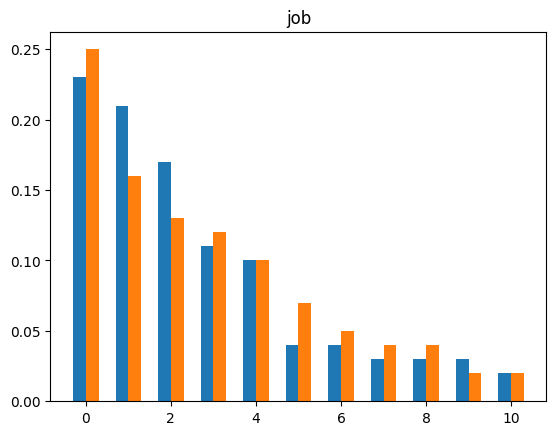

MultiIndex([('no',  'married'),
            ('no',   'single'),
            ('no', 'divorced')],
           names=['y', 'marital'])


y    marital 
no   married     0.61
     single      0.27
     divorced    0.11
yes  married     0.52
     single      0.36
     divorced    0.12
Name: proportion, dtype: float64

[0 1 2]


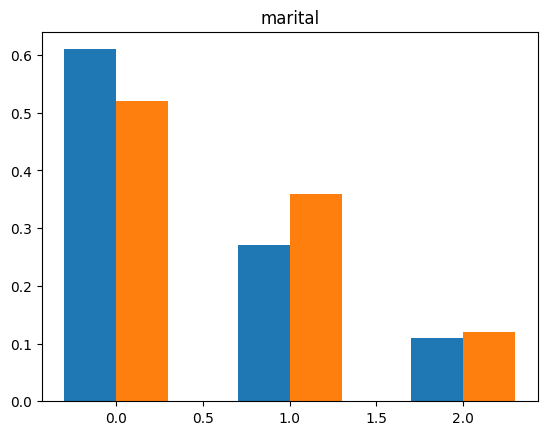

MultiIndex([('no', 'secondary'),
            ('no',  'tertiary'),
            ('no',   'primary')],
           names=['y', 'education'])


y    education
no   secondary    0.54
     tertiary     0.30
     primary      0.16
yes  secondary    0.49
     tertiary     0.40
     primary      0.12
Name: proportion, dtype: float64

[0 1 2]


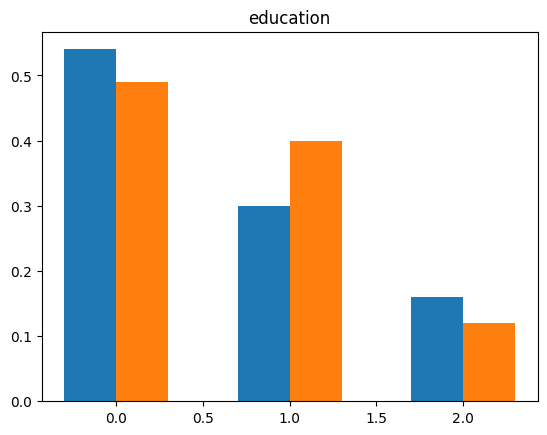

MultiIndex([('no',  'no'),
            ('no', 'yes')],
           names=['y', 'default'])


y    default
no   no         0.98
     yes        0.02
yes  no         0.99
     yes        0.01
Name: proportion, dtype: float64

[0 1]


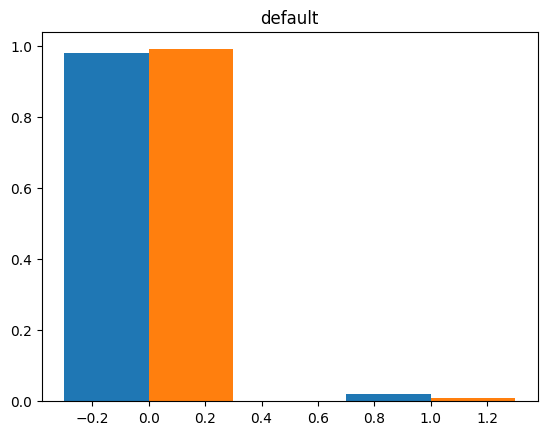

MultiIndex([('no', 'yes'),
            ('no',  'no')],
           names=['y', 'housing'])


y    housing
no   yes        0.58
     no         0.42
yes  no         0.63
     yes        0.37
Name: proportion, dtype: float64

[0 1]


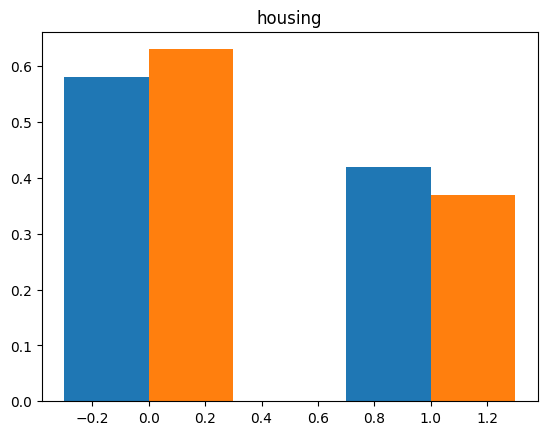

MultiIndex([('no',  'no'),
            ('no', 'yes')],
           names=['y', 'loan'])


y    loan
no   no      0.83
     yes     0.17
yes  no      0.91
     yes     0.09
Name: proportion, dtype: float64

[0 1]


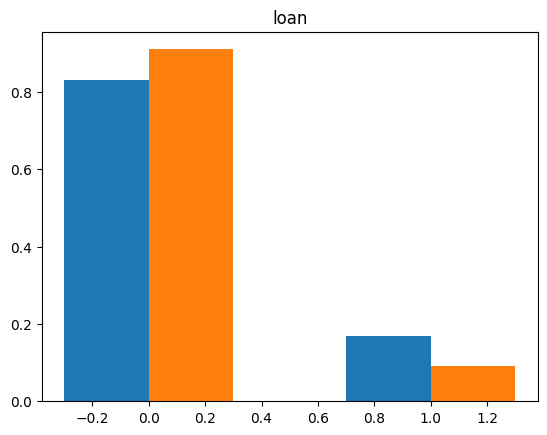

MultiIndex([('no',  'cellular'),
            ('no', 'telephone')],
           names=['y', 'contact'])


y    contact  
no   cellular     0.91
     telephone    0.09
yes  cellular     0.92
     telephone    0.08
Name: proportion, dtype: float64

[0 1]


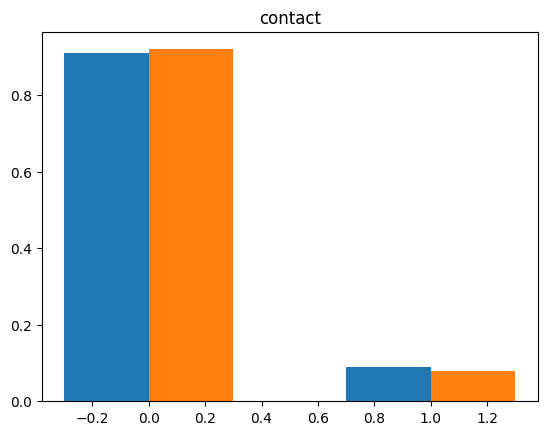

MultiIndex([('no', 'failure'),
            ('no',   'other'),
            ('no', 'success')],
           names=['y', 'poutcome'])


y    poutcome
no   failure     0.67
     other       0.24
     success     0.08
yes  success     0.51
     failure     0.32
     other       0.16
Name: proportion, dtype: float64

[0 1 2]


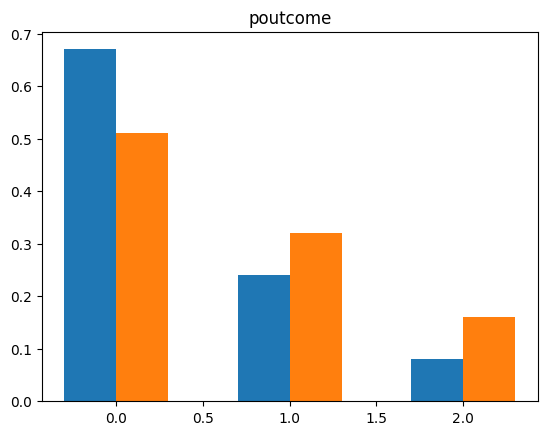

In [153]:
categorical_variables = ['job','marital','education','default','housing','loan','contact','poutcome']#

for i in categorical_variables:
    prop = []
    labels = []#df[i].dropna().unique().astype(str)
    freq = df.groupby('y')[i].value_counts(normalize=True).round(2)
    for j in freq.index:
        prop.append(freq[j])


    labels = freq.index[0:int(len(prop)/2)]
    prop_no = prop[0:int(len(prop)/2)]
    prop_yes = prop[int(len(prop)/2) :]
    print(labels)
    #print(prop_yes)

    display(freq)
    fig1, ax = plt.subplots()
    width = 0.3
    x = np.arange(len(labels))
    print(x)
    rects1 = ax.bar(x-width/2, prop_no, width)
    rects2 = ax.bar(x+width/2, prop_yes, width)
    plt.title(i)
    #plt.xticks(x, labels)
    plt.show()

In [154]:
freq.index
freq.index.names[1]
#x

'poutcome'